# Problem Statement:
The CarDekho company maintains a database of the cars sold through their platform. The data represents the cars sold by Car Dekho and the car related features. We have to build a linear regression model to predict the Selling price of the car. Calculate all the error metrics and diagnostic plots to check the regression result. The dataset contains data for around 301 cars sold by CarDekho.

# Data Description:
Car_Name: Name of the cars.

Year: Year of the car when it was bought.

Selling_Price: Price at which the car is being sold.

Present_Price: Current ex-showroom price of the car.

Kms_Driven: Distance completed by the car in km.

Fuel_Type: Fuel type of the car.

Seller_Type: Tells if a Seller is Individual or a Dealer.

Transmission: Gear transmission of the car (Automatic/Manual).

Owner: Number of previous owners of the car.

# Tasks/Activities List:

Your code should contain the following activities/Analysis:

Read the cars dataset.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

Transform the categorical data.

Apply the Multiple Linear Regression model with and without regularizations (Ridge, Lasso and Elasticnet)

Print the model results

Get the feature importance

Compare all the models using the Sum of Squared Error metric

# Success Metrics:

Below are the metrics for the successful submission of this case study.

Sum of Squared Error metric for the best model < 5000

The R-squared of the best model > 0.8


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 1. Reading the cars dataset.


In [2]:
car_data = pd.read_csv('car data.csv')

car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
print('shape of dataset:',car_data.shape)

shape of dataset: (301, 9)


### Data contains 301 rows × 9 columns

# 2. Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_data.duplicated().any()

True

In [8]:
car_data.drop_duplicates(inplace=True)

In [9]:
print('Re-shaped dataset:',car_data.shape)

Re-shaped dataset: (299, 9)


In [10]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
car_data['Vehicle_Age']=2024- car_data['Year']

#check out the newly added column
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [12]:
car_data.drop(['Year'],axis=1,inplace=True)

In [13]:
car_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


### The mean and standard deviation is approximatly same for Selling_Price (output feature)

## EDA for categorical columns
### Owner Type


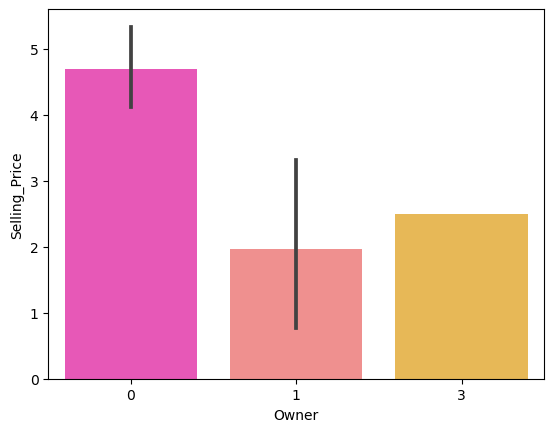

In [14]:
sns.barplot(x='Owner',y='Selling_Price',data=car_data,palette='spring')
plt.show()

 It seems that the vehicles belonging to no previous owner have the highest selling price

## Transmission Type

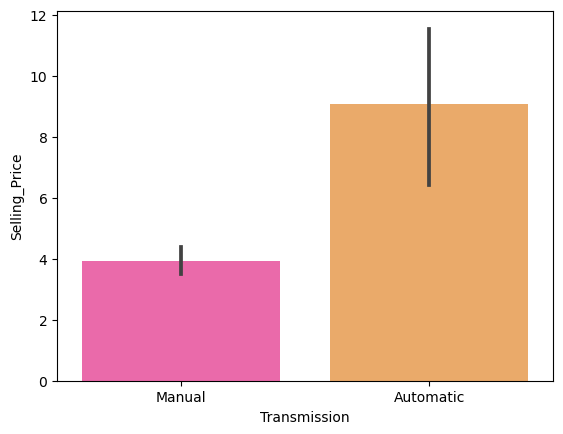

In [16]:
sns.barplot(x='Transmission',y='Selling_Price',data=car_data,palette='spring')
plt.show()

We can see tha automatic vehicles are found to have a large selling price in the market compared to manual transmission.

## Fuel Type

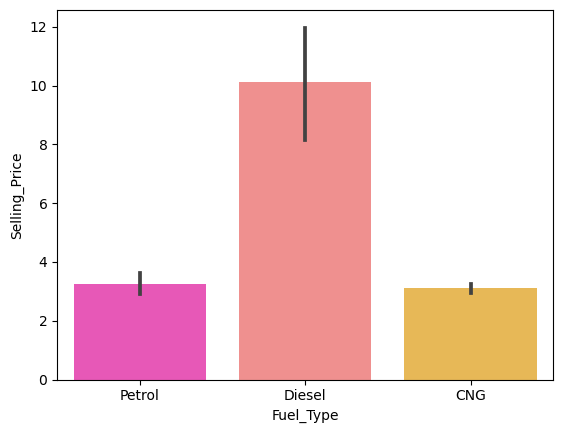

In [17]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car_data,palette='spring')
plt.show()

Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles

## Seller Type

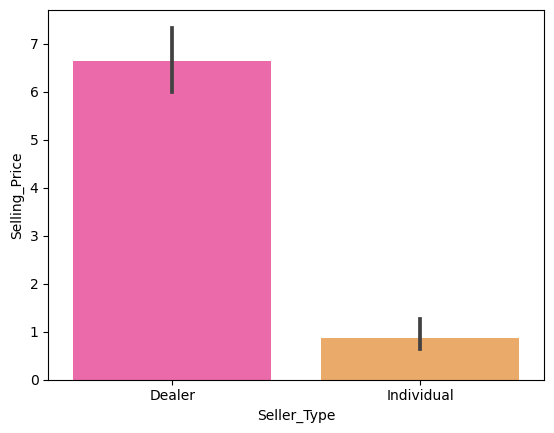

In [18]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=car_data,palette='spring')
plt.show()

Dealers can sell vehicles at a higher selling price than a general individual.

In [19]:
import ydata_profiling

In [20]:
from ydata_profiling import ProfileReport

In [21]:
ProfileReport(car_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Selling Price vs Kms Driven : The selling price is found to be higher for vehicles with less kms covered.

Selling Price vs Present Price : Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.

Selling Price vs Vehicle age : It seems the selling price decreases overall for older vehicles.


# 3. Transforming the categorical data

In [22]:
# Separating the numerical and categorical columns
def data_type(car_data):
    numerical = []
    categorical = []
    for i in car_data.columns:
        if car_data[i].dtype == 'int64' or car_data[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(car_data)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(car_data)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(data, categorical):
    for i in categorical:
        car_data[i] = car_data[i].astype('category')
        car_data[i] = car_data[i].cat.codes
    return car_data

car_data = encoding(car_data, categorical)

In [23]:
car_data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,90,3.35,5.59,27000,2,0,1,0,10
1,93,4.75,9.54,43000,1,0,1,0,11
2,68,7.25,9.85,6900,2,0,1,0,7
3,96,2.85,4.15,5200,2,0,1,0,13
4,92,4.60,6.87,42450,1,0,1,0,10
...,...,...,...,...,...,...,...,...,...
296,69,9.50,11.60,33988,1,0,1,0,8
297,66,4.00,5.90,60000,2,0,1,0,9
298,69,3.35,11.00,87934,2,0,1,0,15
299,69,11.50,12.50,9000,1,0,1,0,7


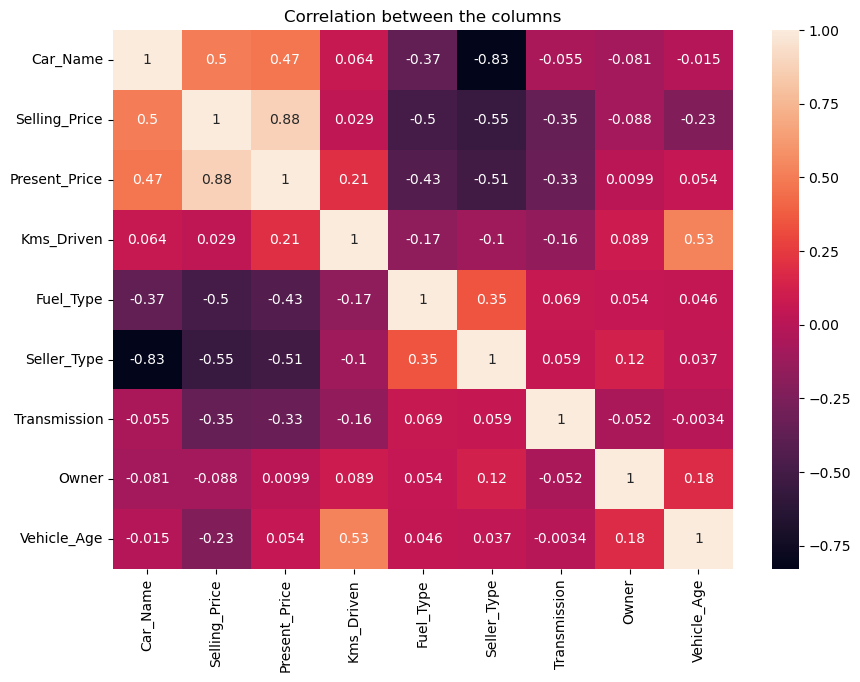

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

### We can observe selling price and present price has high correlation

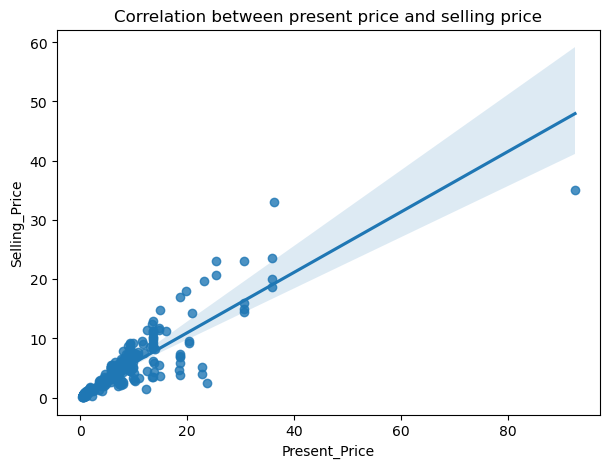

In [25]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)
plt.show()

# 4.Regression Models

In [26]:
X = car_data.drop(['Car_Name','Selling_Price',], axis=1)
y = car_data['Selling_Price']

print("Shape of X is: ",X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (299, 7)
Shape of y is:  (299,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [28]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)

X_test shape: (90, 7)
X_train shape: (209, 7)
y_test shape:  (90,)
y_train shape: (209,)


In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
lr = LinearRegression()
rd = Ridge()
ls = Lasso()
es = ElasticNet()
lr.fit(X_train, y_train)
rd.fit(X_train, y_train)
ls.fit(X_train, y_train)
es.fit(X_train, y_train)

ElasticNet()

In [32]:
pred_lr = lr.predict(X_train)
pred_rd = rd.predict(X_train)
pred_ls = ls.predict(X_train)
pred_es = es.predict(X_train)


In [33]:
pred_lr_test = lr.predict(X_test)
pred_rd_test = rd.predict(X_test)
pred_ls_test = ls.predict(X_test)
pred_es_test = es.predict(X_test)


# 5.Model Results

In [34]:
print(f"Model score of Linear Regression on training data: {lr.score(X_train, y_train)}")
print(f"Model score of Linear Regression on testing data: {lr.score(X_test, y_test)}")
print(f"\nModel score of Ridge Regression on training data: {rd.score(X_train, y_train)}")
print(f"Model score of Ridge Regression on testing data: {rd.score(X_test, y_test)}")
print(f"\nModel score of Lasso Regression on training data: {ls.score(X_train, y_train)}")
print(f"Model score of Lasso Regression on testing data: {ls.score(X_test, y_test)}")
print(f"\nModel score of ElasticNet Regression on training data: {es.score(X_train, y_train)}")
print(f"Model score of ElasticNet Regression on testing data: {es.score(X_test, y_test)}")

Model score of Linear Regression on training data: 0.906773101113777
Model score of Linear Regression on testing data: 0.7674245157992123

Model score of Ridge Regression on training data: 0.9067529626081214
Model score of Ridge Regression on testing data: 0.7676882790371929

Model score of Lasso Regression on training data: 0.7951447169998009
Model score of Lasso Regression on testing data: 0.6330953369370351

Model score of ElasticNet Regression on training data: 0.7762845672080769
Model score of ElasticNet Regression on testing data: 0.6437796936292512


## Linear and Ridge Models have good score compared to other models

# 6. Feature Importance

In [35]:
temp=car_data.drop(columns=['Car_Name','Selling_Price'])

coeff_df_lr = pd.DataFrame(lr.coef_,temp.columns,columns=['Coefficient'])
coeff_df_rd = pd.DataFrame(rd.coef_,temp.columns,columns=['Coefficient'])
coeff_df_ls = pd.DataFrame(ls.coef_,temp.columns,columns=['Coefficient'])
coeff_df_es = pd.DataFrame(es.coef_,temp.columns,columns=['Coefficient'])

In [36]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [37]:
display_side_by_side(coeff_df_lr,coeff_df_rd,coeff_df_ls,coeff_df_es,titles=['Linear Regression',
                                                                             'Ridge Regression',
                                                                            'Lasso Regression',
                                                                            'ElasticNet Regression'])

,Coefficient
Present_Price,3.970087
Kms_Driven,-0.259915
Fuel_Type,-0.443575
Seller_Type,-0.630315
Transmission,-0.611942
Owner,0.130405
Vehicle_Age,-0.984115
,Coefficient
Present_Price,3.941866
Kms_Driven,-0.257589


In [38]:
from pandas import plotting

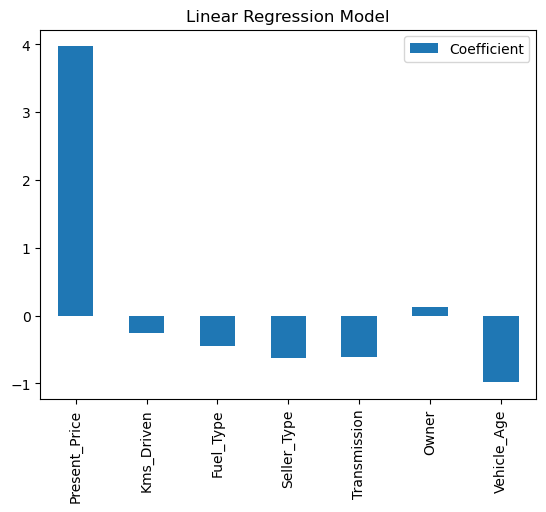

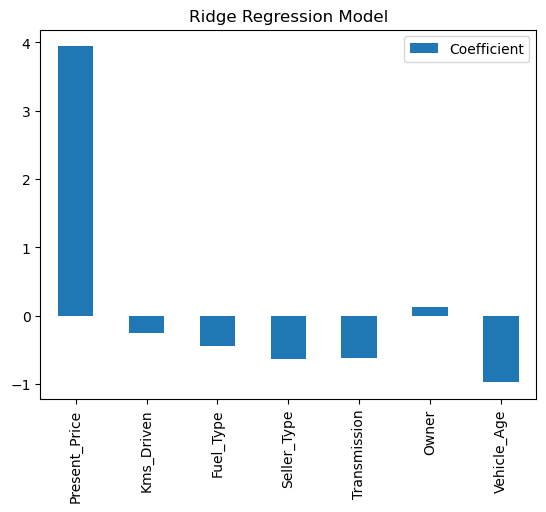

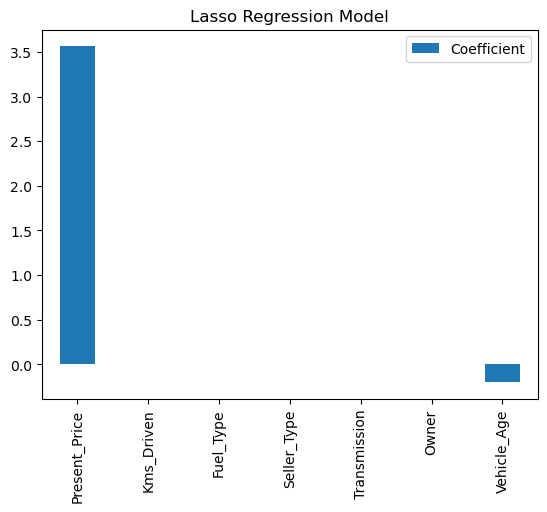

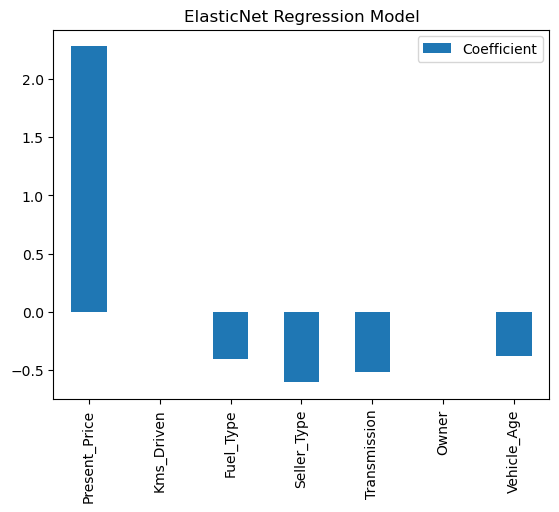

In [39]:
coeff_df_lr.plot(kind='bar',title='Linear Regression Model')
coeff_df_rd.plot(kind='bar',title='Ridge Regression Model')
coeff_df_ls.plot(kind='bar',title='Lasso Regression Model')
coeff_df_es.plot(kind='bar',title='ElasticNet Regression Model')
plt.show()

#### The feature 'Present_Price' has highest weight in defining output for all models

# 7. Compare Sum of Squared Metric

In [40]:
sse_lr = np.sum((y_train - pred_lr)**2)
sse_lr

495.0655960890172

In [41]:
sse_rd = np.sum((y_train - pred_rd)**2)
sse_rd

495.1725381993508

In [42]:
sse_ls = np.sum((y_train - pred_ls)**2)
sse_ls

1087.8491508577379

In [43]:
sse_es = np.sum((y_train - pred_es)**2)
sse_es

1188.0027697222156

In [44]:
sse_lr_test=np.sum((y_test-pred_lr_test)**2)
sse_lr_test

486.67278039976026

In [45]:
sse_rd_test=np.sum((y_test-pred_rd_test)**2)
sse_rd_test

486.12084609406

In [46]:
sse_ls_test=np.sum((y_test-pred_ls_test)**2)
sse_ls_test

767.7615425722744

In [47]:
sse_es_test=np.sum((y_test-pred_es_test)**2)
sse_es_test

745.4041320478937

In [48]:
print("\t\t\tFor Training Data\n\t\t\t-----------------")
print("R2 score of Linear Regression: ", (metrics.r2_score(pred_lr, y_train)))
print("R2 score of Ridge Regression: ", (metrics.r2_score(pred_rd, y_train)))
print("R2 score of Lasso Regression: ", (metrics.r2_score(pred_ls, y_train)))
print("R2 score of ElasticNet Regression: ", (metrics.r2_score(pred_es, y_train)))

			For Training Data
			-----------------
R2 score of Linear Regression:  0.8971882836271681
R2 score of Ridge Regression:  0.8964078701128427
R2 score of Lasso Regression:  0.5893999175717775
R2 score of ElasticNet Regression:  0.39447841746613777


In [49]:
print("\t\t\tFor Testing Data\n\t\t\t-----------------")

print("R2 score of Linear Regression: ", (metrics.r2_score(pred_lr_test, y_test)))
print("R2 score of Ridge Regression: ", (metrics.r2_score(pred_rd_test, y_test)))
print("R2 score of Lasso Regression: ", (metrics.r2_score(pred_ls_test, y_test)))
print("R2 score of ElasticNet Regression: ", (metrics.r2_score(pred_es_test, y_test)))

			For Testing Data
			-----------------
R2 score of Linear Regression:  0.6889299173568592
R2 score of Ridge Regression:  0.6872315811915889
R2 score of Lasso Regression:  -0.018124762641605896
R2 score of ElasticNet Regression:  -0.15309196304653416


In [50]:
list_r2_test=[0.6889299173568589,0.6872315811915889,-0.018124762641605896,-0.15309196304653416]

In [51]:
list_r2_train=[0.897188283627168,0.8964078701128427,0.5893999175717775,0.39447841746613754]

In [52]:
list_sse_test=[sse_lr_test,sse_rd_test,sse_ls_test,sse_es_test]
list_sse_train=[sse_lr,sse_rd,sse_ls,sse_es]


In [53]:
pd.DataFrame({'Model':['Linear','Ridge','Lasso','ElasticNet'],'R2 Score_test':list_r2_test,'R2 Score_train':list_r2_train,
             'Sum of Squared Error_ test':list_sse_test,'Sum of Squared Error_train':list_sse_train})

,Model,R2 Score_test,R2 Score_train,Sum of Squared Error_ test,Sum of Squared Error_train
0,Linear,0.688930,0.897188,486.672780,495.065596
1,Ridge,0.687232,0.896408,486.120846,495.172538
2,Lasso,-0.018125,0.589400,767.761543,1087.849151
3,ElasticNet,-0.153092,0.394478,745.404132,1188.002770


## From above table we can say that Linear and Ridge are our best models